# Project: Investigate a Dataset - [No-Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **This is a dataset that contains information from 100k medical appointment in Brazil and the focus was on what is the effect of No show up of patients after been scheduled for apointment with the Doctor**
**This dataset includes about 14 columns which was aimed at giving a better view of the dataset the columns include**

<ul>
<li>PatientId-- This is the unique ID for each patient</li>
    <li>AppointmentID--This is given to each pateint for each appointment a patient may have more than one Appointment ID but the patient ID is unique</li>
    <li>Gender-- For this Data we have only 2 option which is Male and Female This is the se of each patient</li>
    <li>ScheduledDay-- This is the actual appointment Date for the patient and this is the time they are to see the Docor</li>
    <li>AppointmentDay-- This is the Date the patient came to register or book to see the Doctor</li>
    <li>Age-- This is the actual age of the Patient as at the time of appointment</li>
    <li>Neighbourhood--This is the location of the appointment for the patient</li>
    <li>Scholarship This records if the patient had the Bolsa Familia scholarship which wass a medium aimed at helping the poor Brazillian families </li>
    <li>Hipertension--This record if the patient has Hypertension or Not</li>
    <li>Diabetes---This record if the patient has Diabetes or Not</li>
    <li>Alcoholism--This record if the patient takes Alcohol or Not</li>
    <li>Handcap--This record if the patient is Handicap or Not</li>
    <li>SMS_received-- This record if the patient received an sms message or Not</li>
    <li>No-show-- This record if the patient showed up or Not </li>
</ul>


### Question(s) for Analysis
**Q1. Does the Gender of a patient contribute to the show up of a patient or it does not contribute?**


**Q2. Does the age range of the age range of patients affect the show up at the scheduled time or it does not?**


**Q3. Which days of the week does the Sms received affect the patients show up at the scheduled time the most and why?**


**Q4. What can be said about the sms received and the time interval for patients show up at the scheduled time?**

In [2]:
#importing all needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **We will try to load the data from the link at kaggle and then view a few lines after which we will, perform some cleaning of the dataset to make easily understood by all and easy to read.**


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#importing the dataframe
df=pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [5]:
#check the total columns and rows in the dataset
shape=df.shape
def func(shape):
    print('The Number of rows and columns of the dataset are ',shape)
func(shape)

The Number of rows and columns of the dataset are  (110527, 14)


**We have 14 columns and 110527  columns in this dataset

In [6]:
df.info() # Checking for the empty rows for each columns and also the daytypes so as to aviod errors when analysing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.isna().any().sum()

0

**We dont have any missing value and also our columns are having the right datatype**

In [55]:
#convert all the columns to lowercase
df.columns= df.columns.str.lower()

In [56]:
#rename of the dependent variable no-show to show so it can be easily understood
df.rename({'no-show':'show'},axis=1,inplace=True)

In [57]:
#Converting changing of the value to be easily understood by all.
df['show']=df['show'].replace(['No','Yes'],['Yes','No'])

In [58]:
#Renaming of some columns that were mispelt maybe because of rush when entering the data
df.rename({'hipertension':'hypertension','handcap':'handicap'},axis=1,inplace=True)

In [59]:
# here we created two new columns for scheduled date and time so we seperated the scheduledday
df['scheduleddate'] = pd.to_datetime(df['scheduledday']).dt.date
df['scheduleddime'] = pd.to_datetime(df['scheduledday']).dt.time


In [60]:
# here we created two new columns for appointment date and time so we seperated the appointmentDay

df['appointmentdate'] = pd.to_datetime(df['appointmentday']).dt.date
df['appointmentime'] = pd.to_datetime(df['appointmentday']).dt.time
df['day'] = pd.to_datetime(df['appointmentday']).dt.day_name()


In [61]:
#drop irrelevant columns for the analysis.  This columns are not very useful for this analysis and if they are there they reduce speed of data accessibilty
df.drop(['appointmentday','scheduledday','patientid','appointmentid'],inplace=True,axis=1)

In [62]:
#Create a musk
came=df['show']=='Yes'
didnot_come=df['show']=='No'
df['came']= came
df['didnot_come']= didnot_come

In [63]:
# we created another column which is th differnce between the appointment time and the scheduled time 
df['diff_time']=df['appointmentdate']-df['scheduleddate']

In [64]:
# we also remove the days from the values so as to make it an int value 
df['diff_time'] = pd.to_numeric(df['diff_time'].astype(str).str[:-4], errors='coerce') 

In [65]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [66]:
bins = [0,18,37,55,155]
names=['Children','Youth','Adult','Senior']
df['age_group'] = pd.cut(df['age'],bins,labels=names)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduleddate,scheduleddime,appointmentdate,appointmentime,day,came,didnot_come,diff_time,age_group
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,18:38:08,2016-04-29,00:00:00,Friday,True,False,0,Senior
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,16:08:27,2016-04-29,00:00:00,Friday,True,False,0,Senior
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,16:19:04,2016-04-29,00:00:00,Friday,True,False,0,Senior
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,17:29:31,2016-04-29,00:00:00,Friday,True,False,0,Children
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,16:07:23,2016-04-29,00:00:00,Friday,True,False,0,Senior


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>],
       [<AxesSubplot:title={'center':'sms_received'}>,
        <AxesSubplot:title={'center':'diff_time'}>, <AxesSubplot:>]],
      dtype=object)

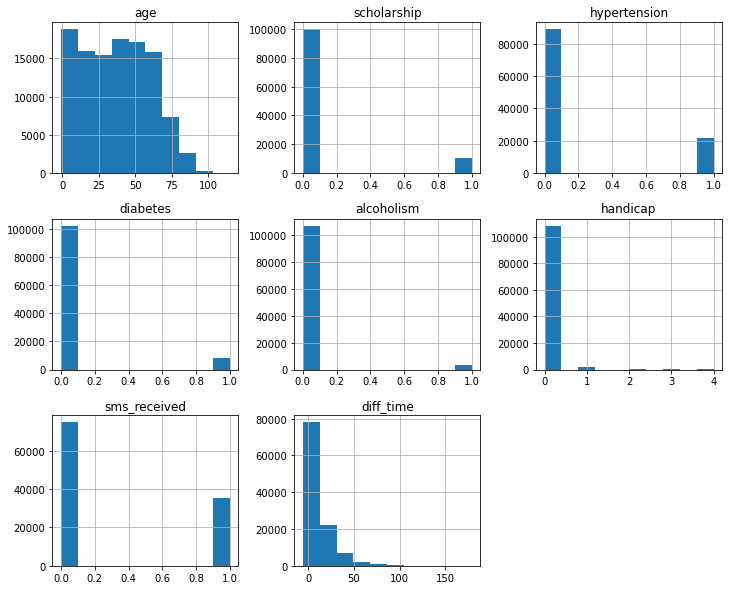

In [67]:
# Here we try to understand show skewed each of the columns are so as to understand the data better
df.hist(figsize=(12,10))

In [68]:
#Trying to understand the dataset easier by viewing some important statistical data witth info()
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,diff_time
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


**We could see that for the age most age range is below 75 and it seems children below 20 years and adults from 30 to 60 visit the the hopsital most often. also seems majority werenot given scholarship,same as hypertension,diabetes, alcohol and handicap, they are mostly not having this challanges.**

**Also we see that a good number of patients haad a mean duration of 10.**

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does the Gender of a patient contribute to the show up of a patient or it does not contribute?)

In [69]:
#what is the head count of patients who show up
df.groupby('gender')['show'].value_counts()

gender  show
F       Yes     57246
        No      14594
M       Yes     30962
        No       7725
Name: show, dtype: int64

In [70]:
df['gender'].describe()

count     110527
unique         2
top            F
freq       71840
Name: gender, dtype: object

Text(0, 0.5, 'Showup')

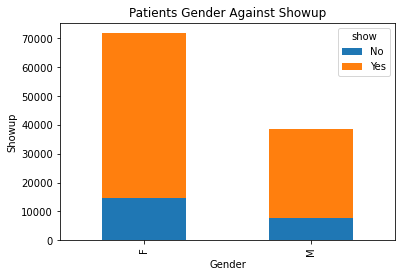

In [71]:
#Plot a bar chart that shows how many male(M) and female(F) show up.
df.groupby('show')['gender'].value_counts().unstack(0).plot(kind='bar',stacked=True)
plt.title('Patients Gender Against Showup')
plt.xlabel('Gender')
plt.ylabel('Showup')

**This shows we have two gender male and female, also that more female showed up at the scheduled date than male**

### Research Question 2  (Does the age range of patients affect the show up at the scheduled time or it does not?)



In [72]:
df.age_group[came].value_counts()

Senior      23201
Adult       21651
Youth       20836
Children    19619
Name: age_group, dtype: int64

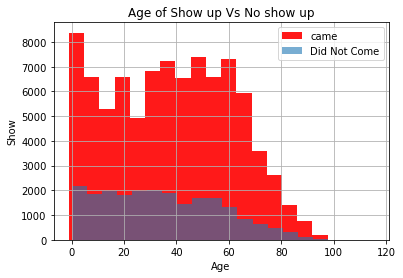

In [73]:
df.age[came].hist(alpha=0.9, bins=20,color='red', label='came')
df.age[didnot_come].hist(alpha=0.6, bins=20, label='Did Not Come')
plt.legend();
plt.xlabel('Age')
plt.ylabel('Show')
plt.title('Age of Show up Vs No show up');

**This is show that most people came than those who didn't come**

age_group  show
Children   Yes     19619
           No       5708
Youth      Yes     20836
           No       6414
Adult      Yes     21651
           No       5255
Senior     Yes     23201
           No       4303
Name: show, dtype: int64


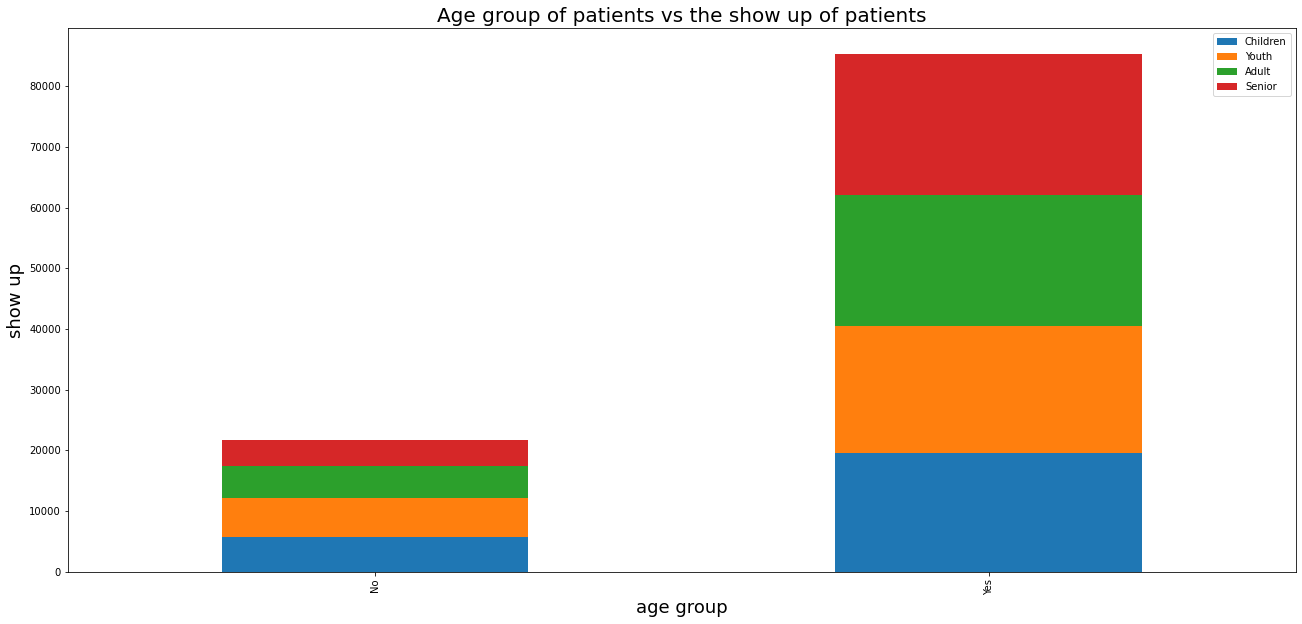

In [74]:
print(df.groupby('age_group')['show'].value_counts())
df.groupby('age_group')['show'].value_counts().unstack(0).plot(kind='bar',figsize=(22,10),stacked=True);
plt.title('Age group of patients vs the show up of patients',fontsize=20)
plt.xlabel('age group',fontsize=18)
plt.ylabel('show up',fontsize=18)
plt.legend();

**This shows that majority showed up and showing that the age category of that showup are close to themselves and same for those that did  not show up**

### Research Question 3  (Which days of the week does the Sms received  affect the patients  show up at the scheduled time the most and why?)

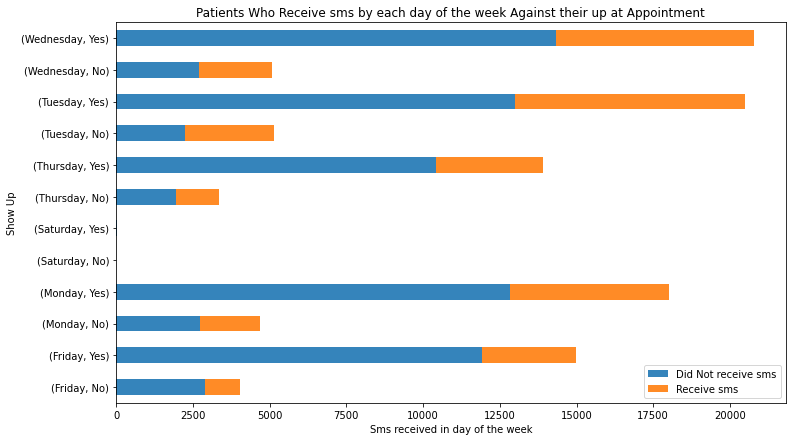

In [75]:
df.groupby(['sms_received','day'])['show'].value_counts().unstack(0).plot(kind='barh',alpha=0.9,stacked=True,figsize=(12,7));
plt.title('Patients Who Receive sms by each day of the week Against their up at Appointment')
plt.xlabel('Sms received in day of the week')
plt.ylabel('Show Up')
plt.legend(['Did Not receive sms','Receive sms']);

**this shows that tuesday and wednesday are the days of more showup this maybe be because the sms reminder is usually sent at the begining of the week that is on monday**

### Research Question 2  (What can be said about the sms received and the time interval for patients show up at the scheduled time?)

In [76]:
df.groupby(['sms_received','diff_time'])['show'].value_counts().sum()

110527

In [77]:
df.groupby(['sms_received','diff_time'])['show'].value_counts().head()

sms_received  diff_time  show
0             -6         No          1
              -1         No          4
               0         Yes     36771
                         No       1792
               1         Yes      4100
Name: show, dtype: int64

In [78]:
df.groupby(['sms_received','diff_time'])['show'].value_counts().tail()

sms_received  diff_time  show
1             169        No      1
              176        Yes     8
                         No      5
              179        Yes     6
                         No      1
Name: show, dtype: int64

In [79]:
df.groupby(['sms_received','diff_time'])['show'].value_counts().describe()

count      429.000000
mean       257.638695
std       1819.548075
min          1.000000
25%          6.000000
50%         29.000000
75%        179.000000
max      36771.000000
Name: show, dtype: float64

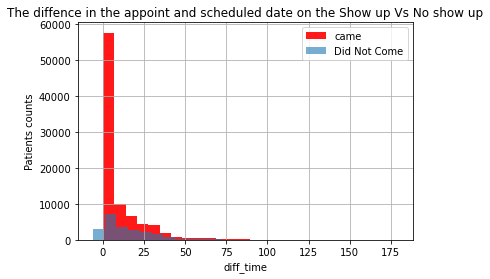

In [80]:
df.diff_time[came].hist(alpha=0.9, bins=26,color='red', label='came')
df.diff_time[didnot_come].hist(alpha=0.6, bins=26, label='Did Not Come')
plt.legend();
plt.xlabel('diff_time')
plt.ylabel('Patients counts')
plt.title('The diffence in the appoint and scheduled date on the Show up Vs No show up');

**From this analysis we see that those who were attended to that very day that they came for appointment had the maximum number of turn up at the scheduled time. and we can concude that as the difference in appointment and scheduled date kept increasin though the population that needed appointment were not very high again, a good number of patients were still coming at the scheduled date.**

### Research Question 2  (Does most Patients sufffer from Diabetes and Hypertension?)

In [81]:
df.groupby(['diabetes','hypertension'])['show'].value_counts().sum()

110527

In [82]:
df.groupby(['diabetes','hypertension','age_group'])['show'].value_counts()

diabetes  hypertension  age_group  show
0         0             Children   Yes     19565
                                   No       5680
                        Youth      Yes     19773
                                   No       6121
                        Adult      Yes     15947
                                   No       3947
                        Senior     Yes     10825
                                   No       1871
          1             Children   Yes        19
                                   No         12
                        Youth      Yes       814
                                   No        210
                        Adult      Yes      4079
                                   No        916
                        Senior     Yes      7772
                                   No       1493
1         0             Children   Yes        27
                                   No         15
                        Youth      Yes       128
                             

In [83]:
df.groupby(['diabetes','hypertension'])['show'].value_counts()

diabetes  hypertension  show
0         0             Yes     69011
                        No      18258
          1             Yes     12684
                        No       2631
1         0             Yes      1168
                        No        289
          1             Yes      5345
                        No       1141
Name: show, dtype: int64

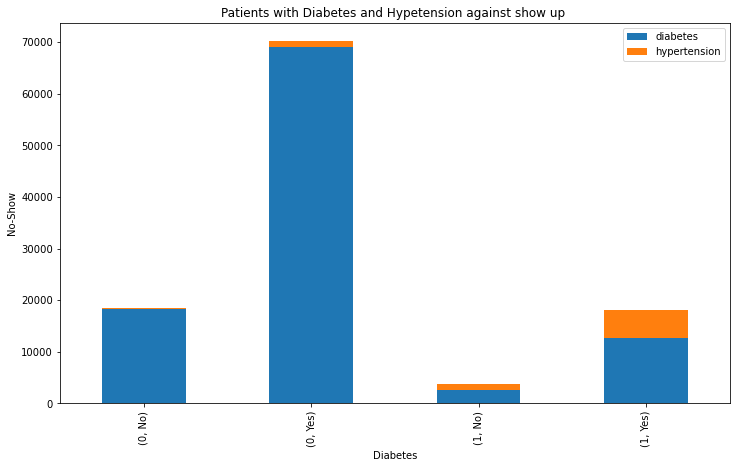

In [84]:
df.groupby(['diabetes','hypertension'])['show'].value_counts().unstack(0).plot(kind='bar',stacked=True,figsize=(12,7));
plt.title('Patients with Diabetes and Hypetension against show up ')
plt.xlabel('Diabetes')
plt.ylabel('No-Show')
plt.legend(['diabetes','hypertension']);

**Here we see that although a good number of patients were  not having this diseases but for those having the disease more than 75% of them were around.It is most likely that they came because of these sicknesses.**

<a id='conclusions'></a>
## Conclusions

**From this analysis we can conclude that they were more females that came to the hospital also patients came more on tuesday and wednesday than other days, this was maybe because of the reminders they will have gotten on monday.**

**We also observed that we had more seniors adults of age from 55 and above which had some sickness while those children and youth were free from these sicknesses**
**


**We also have a limitation of data about the distance between the residence of the patients and the location of the hospital as this can also contribute to the show-up of the patients**

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1